[-1.0, -0.6301485767033734, -0.42675105879318, -0.2675157027250471, -0.14847785706356148, -0.06016605354118719, -0.36547710649654214, -0.5225662395850852, -0.649525306550325, -0.74695345521771, -0.8216957290463457, -0.8787278075606995, -0.9219674951355371, -0.9544897025477, -0.9787029108103047, -0.9964951731437374, -1.0093384741452032, -1.0183875800089206, -1.0245415542132268, -1.028499750013458, -1.0308066329299814, -1.0318845068754163, -1.0320595869954545, -1.0315828063132646, -1.0306467835549777, -1.0293984703629118, -1.0279492165502204, -1.0263831765653242, -1.0247619241062667, -1.0231318532120166, -1.0215264396373287, -1.0199687535027946, -1.0184747446778628, -1.017054516759028, -1.0157136446751711, -1.0144553603094513, -1.0132799549749663, -1.0121861413980098, -1.0111715522953122, -1.0102329991757268, -1.0093666158874426, -1.00856806235646, -1.0078330797629664, -1.0071578931449197, -1.0065385256160566, -1.0059711399250775, -1.005451340175446, -1.0049755450757973, -1.0045403138426

/home/eleboss/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


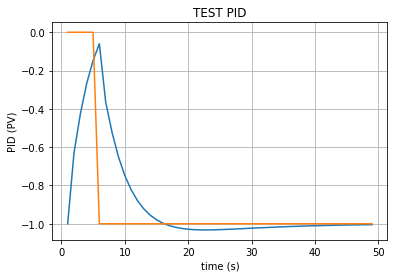

In [14]:
%matplotlib inline 
import PID
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline

def test_pid(P = 0.2,  I = 0.0, D= 0.0, L=100):
    """Self-test PID class

    .. note::
        ...
        for i in range(1, END):
            pid.update(feedback)
            output = pid.output
            if pid.SetPoint > 0:
                feedback += (output - (1/i))
            if i>9:
                pid.SetPoint = 1
            time.sleep(0.02)
        ---
    """
    pid = PID.PID(P, I, D)

    pid.SetPoint=0.0
    pid.setSampleTime(0.01)

    END = L
    feedback = 0

    feedback_list = []
    time_list = []
    setpoint_list = []

    for i in range(1, END):
        pid.update(feedback)
        output = pid.output
        if pid.SetPoint > 0:
            feedback += (output - (1/i))
        else:
            feedback += (output)
        if i>5:
            pid.SetPoint = -1
        time.sleep(0.02)

        feedback_list.append(feedback)
        setpoint_list.append(pid.SetPoint)
        time_list.append(i)

    time_sm = np.array(time_list)
    time_smooth = np.linspace(time_sm.min(), time_sm.max(), 20)
    feedback_smooth = spline(time_list, feedback_list, time_smooth)
    print feedback_list

    plt.plot(time_list, feedback_list)
    plt.plot(time_list, setpoint_list)

    plt.xlabel('time (s)')
    plt.ylabel('PID (PV)')
    plt.title('TEST PID')



    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    test_pid(0.3, 1, 0.001, L=50)
#    test_pid(0.8, L=50)